<h1>T3 - Visualização de uma imagem 360<h3/>

<p>Faça um notebook que leia uma imagem equiretangular de 360 graus e renderize para uma camera que tenha uma API 
    Camera(self, fov, w, h, d, theta, phi), onde theta e phi são os ângulos em coordenadas polares do eixo Xe da câmera no
    sistema da imagem360. </p>

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from math import sin, cos, sqrt
import sys

TOL = sys.float_info.epsilon
print(TOL)

2.220446049250313e-16


In [15]:
def vetor(x, y, z):
    return  np.array([x, y, z], dtype = np.float)

def dot(u, v):
    return u[0] * v[0] + u[1] * v[1] + u[2] * v[2]

def norma(u):
    return sqrt(dot(u, u))

def unit(u):
    norm = norma(u)
    return u / norm if norm > TOL else u

In [72]:
class Camera:
    def __init__(self, fov, w, h, d, theta, phi):
        self.fov = fov
        self.w = w
        self.h = h
        self.d = d
        self.a = 2 * d * np.tan(fov * np.pi / 360)
        self.b = self.a * w / h
        self.eye = np.array([0., 0., 0.,])
        theta = theta * np.pi / 180
        phi = phi * np.pi / 180
        ct = cos(theta)
        st = sin(theta)
        cp = cos(phi)
        sp = sin(phi)
        self.ze = np.array([st * cp, st * sp, ct])
        up = np.array([0, 0, 1])
        self.xe = unit(np.cross(self.ze, up))
        self.ye = unit(np.cross(self.ze, self.xe))
        self.img = np.zeros(shape = (h, w, 3), dtype = np.float)
    
    def ray_to(self, x_im, y_im):
        x = self.b * (x_im / self.w - 0.5)
        y = self.a * (y_im / self.h - 0.5)
        z = self.d
        ray = x * self.xe + y * self.ye + z * self.ze
        return ray

    def pixel (self, x_im, y_im, rgb):
        self.img[y_im, x_im, :] = rgb
        
    def get_w(self):
        return self.w
    
    def get_h(self):
        return self.h
    
    def imshow(self):
        plt.figure(figsize = (8, 4))
        plt.imshow(self.img)
        plt.show()
    
    def mostra(self):
        print("fov =", self.fov, "d =", self.d)
        print("(w, h) = (", self.w, ",", self.h, ")")
        print("(b, a) = (", self.b, ",", self.a, ")")
        print("xe =", self.xe)
        print("ye =", self.ye)
        print("ze =", self.ze)


In [73]:
cam = Camera(60, 800, 600, 1, 120, 180)
cam.mostra()
v0 = cam.ray_to(400, 300)
v1 = cam.ray_to(400, 0)
ang = np.arccos(dot(unit(v0), unit(v1))) * 180 / np.pi
print(ang)

fov = 60 d = 1
(w, h) = ( 800 , 600 )
(b, a) = ( 1.539600717839002 , 1.1547005383792515 )
xe = [ 1.2246468e-16  1.0000000e+00 -0.0000000e+00]
ye = [ 5.00000000e-01 -6.12323400e-17 -8.66025404e-01]
ze = [-8.66025404e-01  1.06057524e-16 -5.00000000e-01]
29.999999999999993


In [74]:
class Img360:
    def __init__(self, radius, img360):
        self.radius = radius
        self.img360 = img360
        self.w = img360.shape[1]
        self.h = img360.shape[0]
    
    def trace(self, ray):
        xy = sqrt(ray[0] * ray[0] + ray[1] * ray[1])
        phi = np.arctan2(ray[1], ray[0])
        theta = np.arctan2(xy, ray[2])
        
        u = 0.5 * (1 + phi / np.pi)
        v = theta / np.pi
        
        xi = int((self.w - 1) * u)
        yi = int((self.h - 1) * v)
        
        cor = self.img360[yi, xi, :]
        rgb = np.array(cor)
        
        return rgb / 255

In [75]:
class Scene:
    def __init__(self, camera, sphere):
        self.camera = camera
        self.sphere = sphere
    
    def render(self):
        w = self.camera.get_w()
        h = self.camera.get_h()
        
        for y in range(h):
            for x in range(w):
                ray = self.camera.ray_to(x, y)
                rgb = self.sphere.trace(ray)
                self.camera.pixel(x, y, rgb)


In [76]:
path = 'images/'
name = 'Sunset_Southside_Slopes_Pittsburgh_Equirectangular_Panoramic.jpg'
fname = path + name
fname

'images/Sunset_Southside_Slopes_Pittsburgh_Equirectangular_Panoramic.jpg'

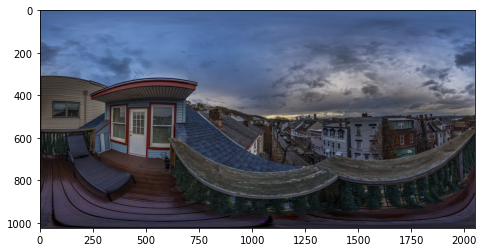

In [77]:
plt.figure(figsize = (8, 4))
img360 = plt.imread(fname)
plt.imshow(img360)
plt.show()

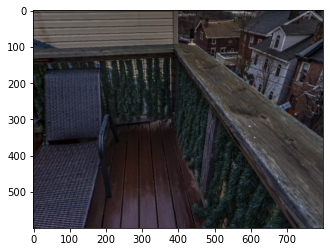

In [78]:
img = Img360(10, img360)
scn = Scene(cam, img)
scn.render()
cam.imshow()

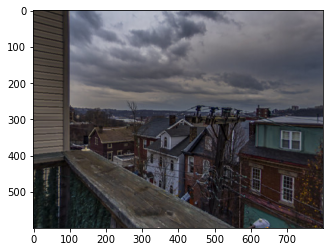

In [79]:
cam = Camera(60, 800, 600, 1, 90, 150)
scn = Scene(cam, img)
scn.render()
cam.imshow()

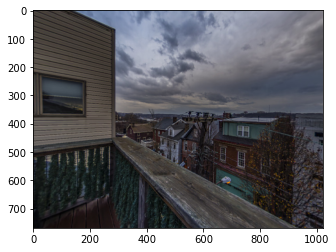

In [80]:
cam = Camera(90, 1024, 768, 1, 90, 150)
scn = Scene(cam, img)
scn.render()
cam.imshow()